In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt



In [ ]:
data = pd.read_csv("/content/network traffic.csv")
data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.0.13,192.168.0.1,ICMP,146,"Echo (ping) request id=0x4d01, seq=0/0, ttl=6..."
1,2,0.000000,192.168.0.13,192.168.0.16,TCP,1498,9020 > 49784 [ACK] Seq=5029255 Ack=1 Win=186...
2,3,0.000144,192.168.0.13,192.168.0.16,TCP,140,"9020 > 49784 [PSH, ACK] Seq=5030643 Ack=1 Wi..."
3,4,0.000227,192.168.0.13,192.168.0.16,TCP,1502,9020 > 49784 [ACK] Seq=5030673 Ack=1 Win=186...
4,5,0.000545,192.168.0.1,192.168.0.13,ICMP,146,"Echo (ping) reply id=0x4d01, seq=0/0, ttl=6..."


In [ ]:
data.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

In [ ]:
time_signal = data['Time']

In [ ]:
time_vector = np.linspace(0, max(time_signal), len(time_signal))

In [ ]:
# Perform Continuous Wavelet Transform (CWT)
wavelet = 'cmor'  # Continuous Morlet wavelet
scales = np.arange(1, 128)  # Scales for CWT
coefficients, frequencies = pywt.cwt(time_signal, scales, wavelet)

**Calculate Mean, Median and Standard Deviation of CWT Coefficients**

In [ ]:
mean_coefficients = np.mean(coefficients, axis=1)
median_coefficients = np.median(coefficients, axis=1)
std_coefficients = np.std(coefficients, axis=1)

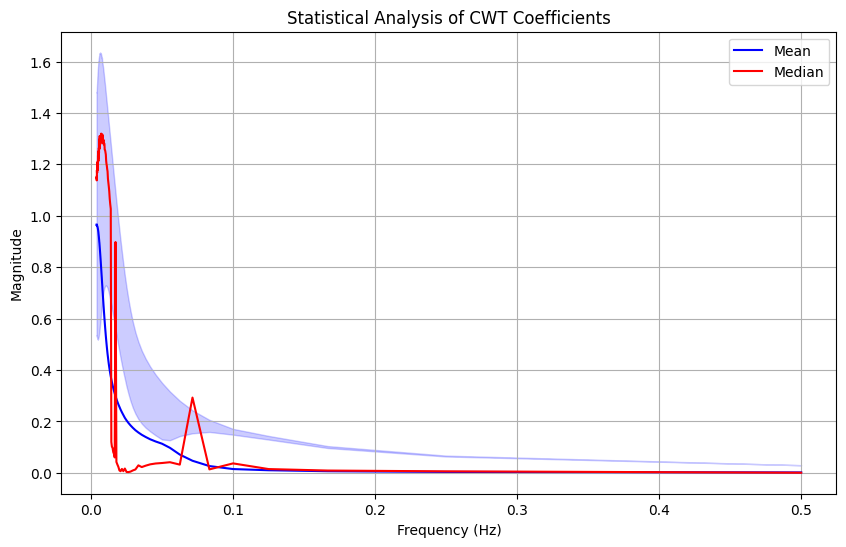

In [ ]:
# Plot the statistical analysis
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(mean_coefficients), label='Mean', color='blue')
plt.plot(frequencies, np.abs(median_coefficients), label='Median', color='red')
plt.fill_between(frequencies, np.abs(mean_coefficients - std_coefficients), np.abs(mean_coefficients + std_coefficients),
                 color='blue', alpha=0.2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Statistical Analysis of CWT Coefficients')
plt.legend()
plt.grid(True)
plt.show()


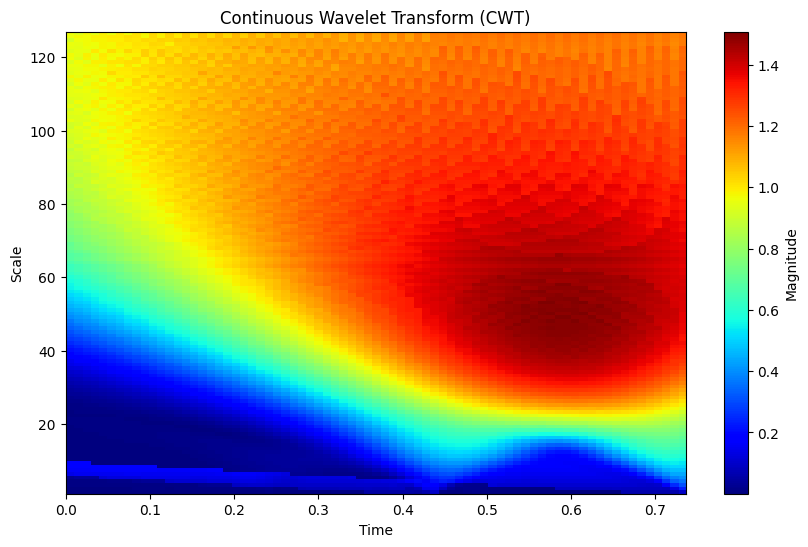

In [ ]:
# Plot the CWT coefficients
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), extent=[min(time_vector), max(time_vector), min(scales), max(scales)],
           aspect='auto', cmap='jet', origin='lower')
plt.colorbar(label='Magnitude')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Continuous Wavelet Transform (CWT)')
plt.show()

**Outliers**

In [ ]:
z_scores = (coefficients - np.mean(coefficients)) / np.std(coefficients)

# Threshold for outliers
threshold = 0.5
outlier_indices = np.abs(z_scores) > threshold
outlier_points = np.argwhere(outlier_indices)

print("Outlier Points:")
print(outlier_points)


Outlier Points:
[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [126  72]
 [126  73]
 [126  74]]
